In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Exploratory Data Analysis

Data yang digunakan berupa employability dari sebuah universitas.

In [2]:
df = pd.read_csv('./dataset/Placement_Data_Full_Class.csv')

In [3]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
df.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [5]:
df.groupby('status')[['status', 'salary']].count()

,status,salary
status,,
Not Placed,67,0
Placed,148,148


Salary dan sl_no (Serial Number) tidak digunakan dalam prediksi ini, karena tidak berpengaruh terhadap status penerimaan

In [6]:
df.drop(['salary', 'sl_no'], axis=1, inplace=True)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [7]:
df['status'] = df.status.replace(['Placed', 'Not Placed'], [1, 0])

In [8]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1


# Pemisahan dataframe berdasarkan value kolom "status"

Dataframe untuk status = 1 (Placed)

In [9]:
# Dataframe untuk status = 1 (Placed)
df_status_1 = df[df["status"] == 1]

df_status_1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,1
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,1


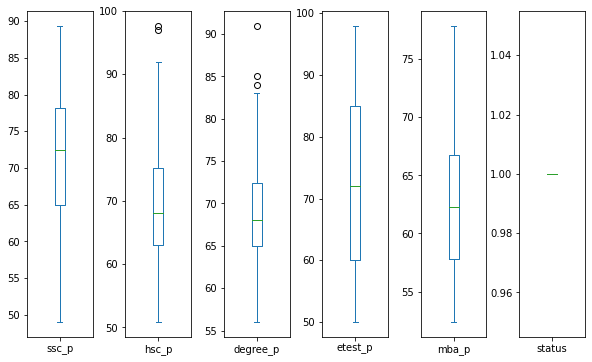

In [10]:
# Outlier detection untuk df_status_1
df_status_1.plot(kind = "box", subplots = True, sharey = False, figsize = (10, 6))

plt.subplots_adjust(wspace = 0.5)
plt.show()

In [11]:
# sns.boxplot(data = df_status_1)

Dataframe untuk status = 0 (Not Placed)

In [12]:
# Dataframe untuk status = 0 (Not Placed)
df_status_0 = df[df["status"] == 0]

df_status_0

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,0
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,0
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,0
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,0
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,0
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,0
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,0
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,0


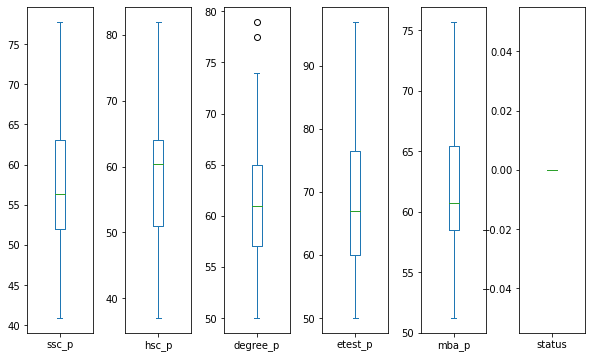

In [13]:
# Outlier detection untuk df_status_0
df_status_0.plot(kind = "box", subplots = True, sharey = False, figsize = (10, 6))

plt.subplots_adjust(wspace = 0.5)
plt.show()

Penggabungan dataframe status 1 dan 0

In [14]:
df_status_combined = pd.concat([df_status_1, df_status_0])

df_status_combined

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,1
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,1
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.00,Central,70.00,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,0
201,M,54.20,Central,63.00,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,0
206,M,41.00,Central,42.00,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,0
208,F,43.00,Central,60.00,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,0


In [15]:
df_status_combined.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status              int64
dtype: object

# Ubah data categorical menjadi numerical

In [16]:
list_column_categorical = list(df_status_combined.select_dtypes(exclude = np.number).columns.values)

for column_name in list_column_categorical:

    df_status_combined[column_name] = df_status_combined[column_name].astype("category")
    df_status_combined[column_name] = df_status_combined[column_name].cat.codes

# Normalisasi

In [25]:
std_scaler = StandardScaler()

scaled_data = std_scaler.fit_transform(df_status_combined.drop('status', axis=1))

df_combined_scaled = pd.DataFrame(scaled_data, columns = df_status_combined.columns.drop('status')).join(df_status_combined['status'])

df_combined_scaled

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0.739434,-0.028087,1.082459,2.268812,0.800763,-0.641955,-1.140102,1.576284,-0.724446,-1.291091,1.123903,-0.597647,1
1,0.739434,1.113369,-0.923823,1.103448,0.800763,1.083298,1.513267,1.576284,1.380364,1.087157,-0.889757,0.687620,1
2,0.739434,-0.213238,-0.923823,0.153313,-1.248809,-2.367207,-0.322843,-0.675550,-0.724446,0.218908,-0.889757,-0.769474,1
3,0.739434,1.712332,-0.923823,0.668391,-1.248809,-0.641955,0.943909,-0.675550,-0.724446,1.864806,-0.889757,-1.164676,0
4,0.739434,1.360545,-0.923823,-0.214600,-1.248809,1.083298,-0.050423,1.576284,1.380364,-0.385092,-0.889757,-0.023744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-1.352386,-0.028087,-0.923823,0.337269,-1.248809,-0.641955,-0.186633,0.450367,-0.724446,1.200407,1.123903,1.663598,1
211,0.739434,-1.213053,-0.923823,-0.306578,0.800763,1.083298,-1.140102,-0.675550,-0.724446,0.520907,1.123903,-0.659504,1
212,0.739434,-2.435049,-0.923823,-2.238122,-1.248809,1.083298,-0.867682,-0.675550,-0.724446,1.879906,-0.889757,-1.527231,1
213,-1.352386,-2.249898,-0.923823,-0.582513,0.800763,1.083298,-0.186633,-0.675550,-0.724446,1.552236,1.123903,0.110281,1


# Pairplot

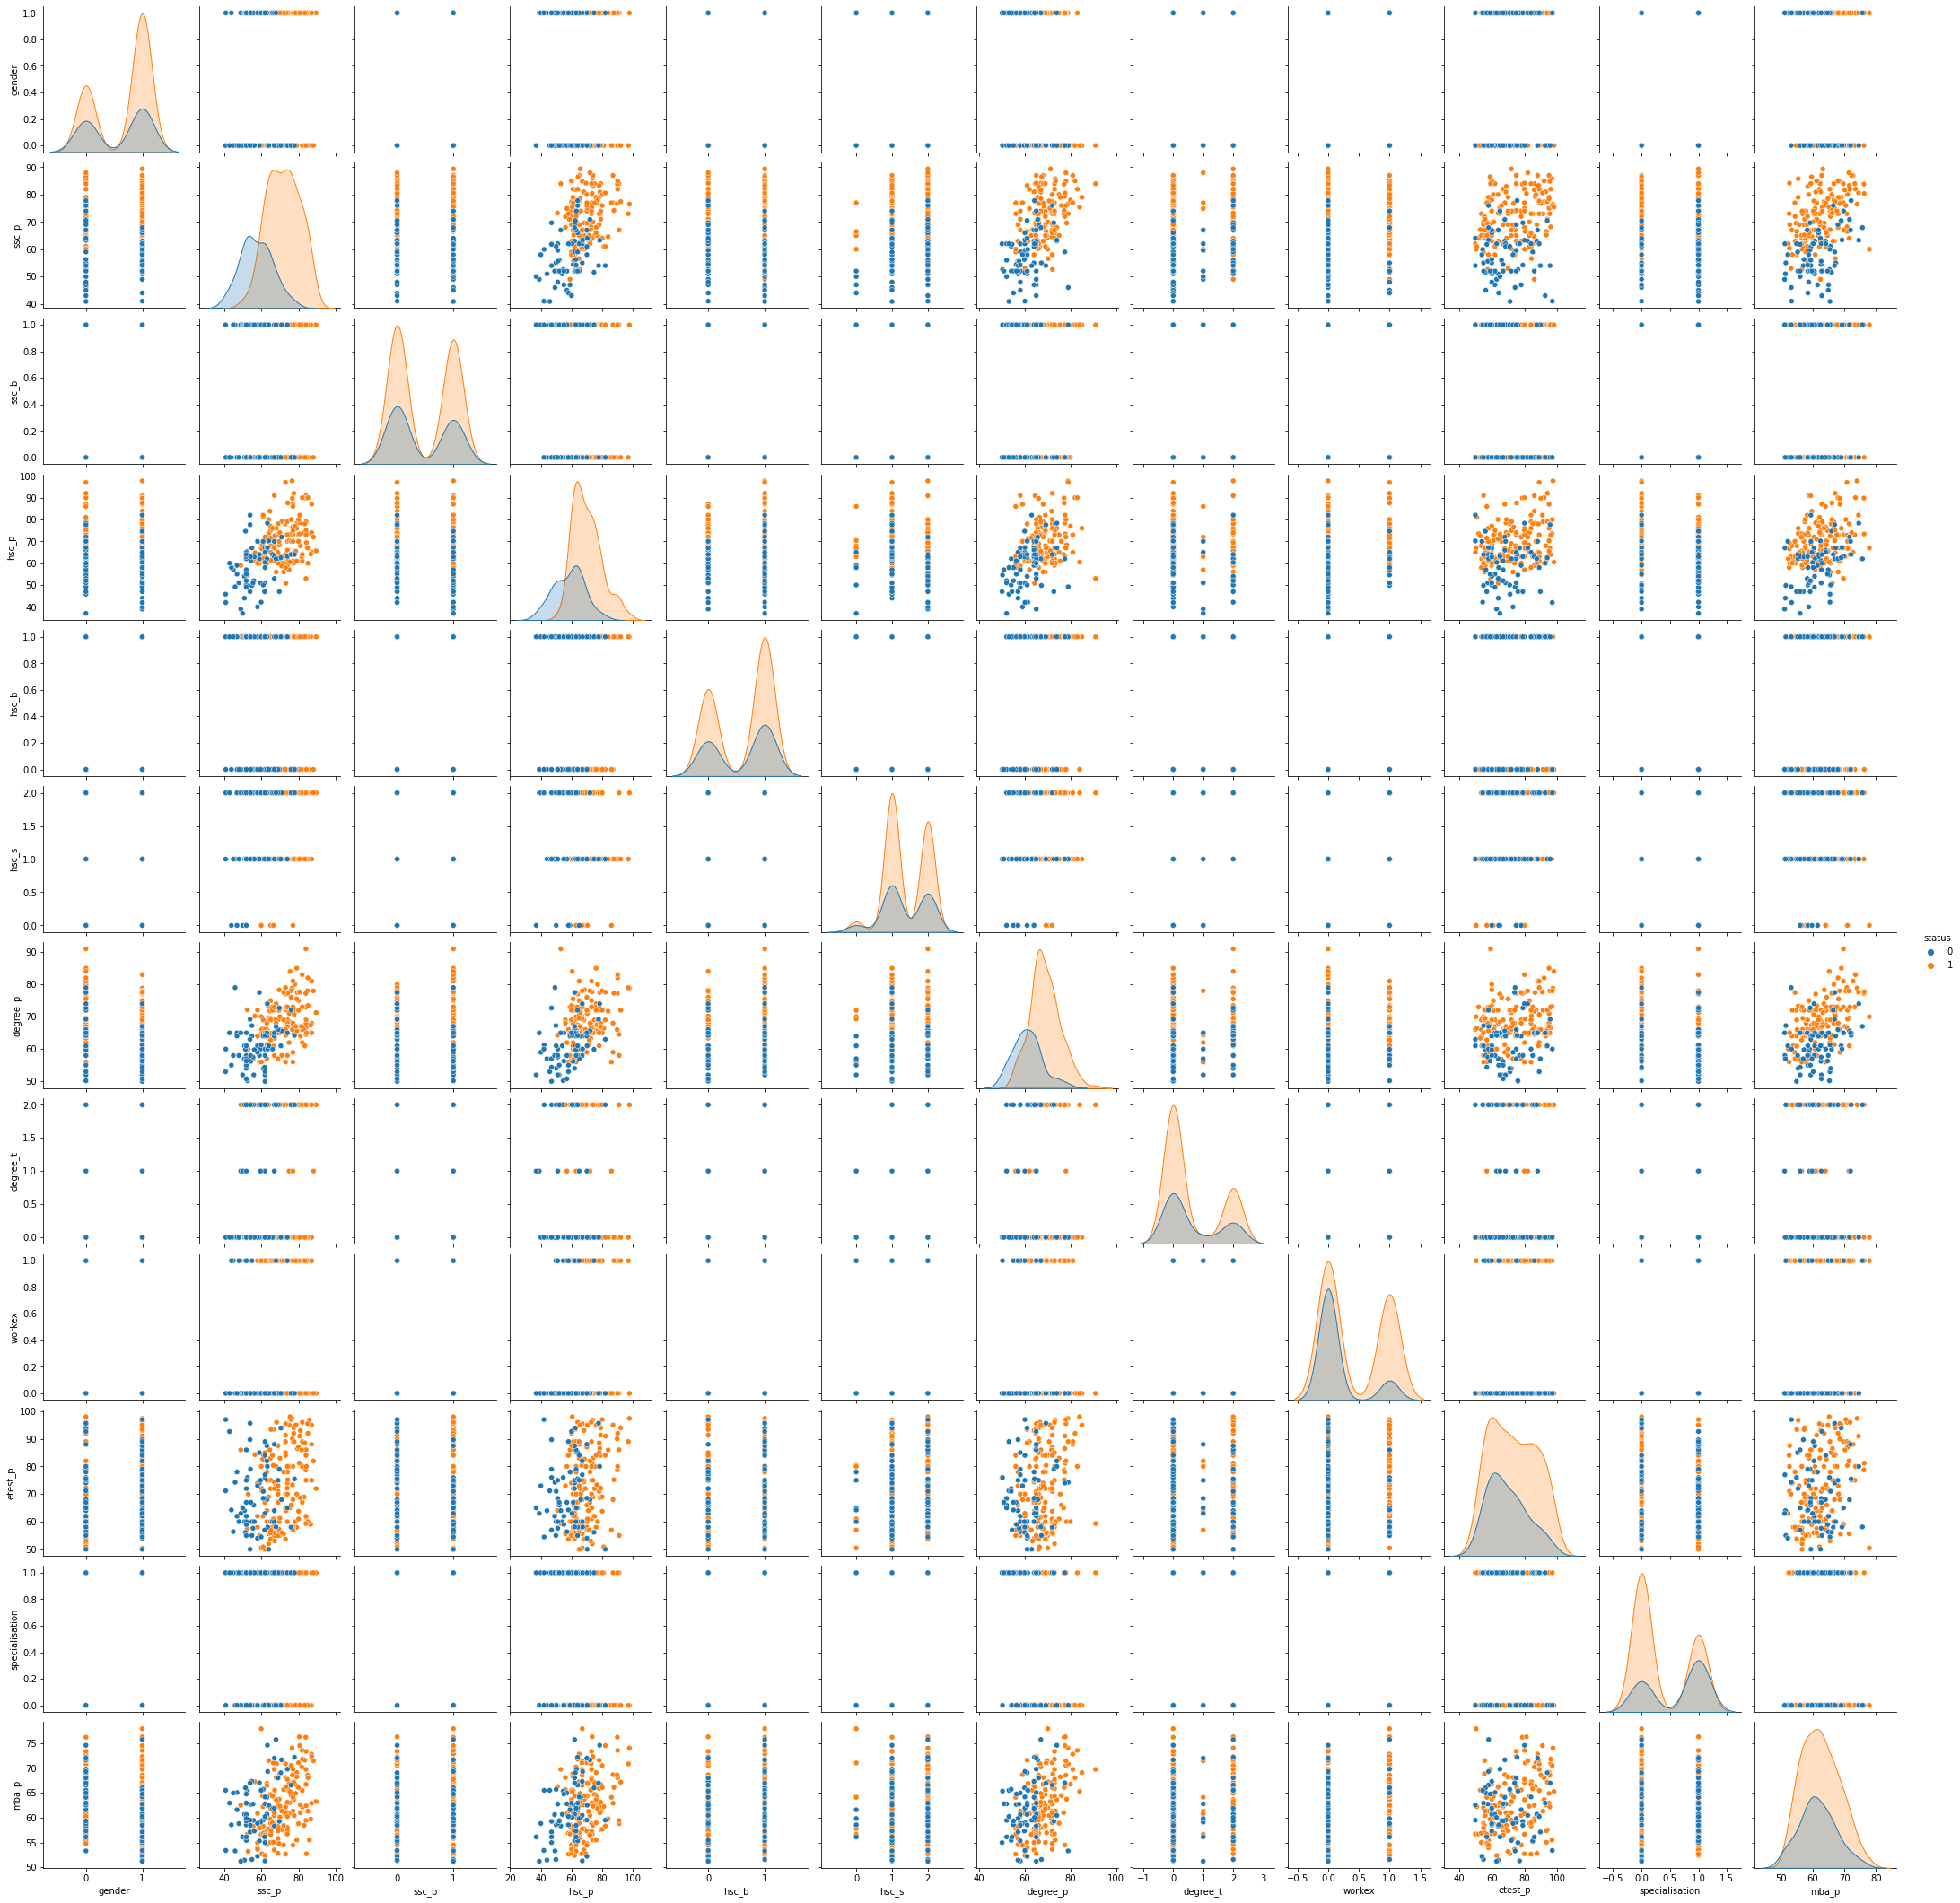

In [18]:
sns.pairplot(df_status_combined, hue='status')

<AxesSubplot:>

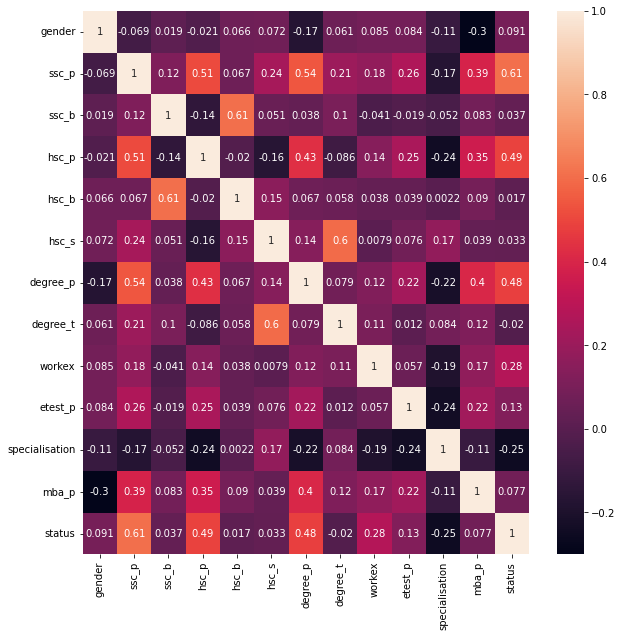

In [19]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_status_combined.corr(), annot=True)

# Scaling Data

In [26]:
df = df_combined_scaled

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('status', axis = 1), df['status'], test_size=0.3, random_state=42)

# Model

# KNN

## Untuned

In [107]:
untuned_knn = KNeighborsClassifier()
untuned_knn.fit(X_train, y_train)

y_predict_untuned = untuned_knn.predict(X_test)

print(classification_report(y_test, y_predict_untuned))
print("Untuned KNN Accuracy : ", accuracy_score(y_test, y_predict_untuned))

              precision    recall  f1-score   support

           0       0.44      0.19      0.27        21
           1       0.70      0.89      0.78        44

    accuracy                           0.66        65
   macro avg       0.57      0.54      0.52        65
weighted avg       0.62      0.66      0.61        65

Untuned KNN Accuracy :  0.6615384615384615


# Tuned

In [118]:
selected_features = list(df.columns)

selected_features.remove("status")

In [130]:
tuned_knn = KNeighborsClassifier(n_neighbors=7)
tuned_knn.fit(X_train, y_train)

y_predict_tuned = tuned_knn.predict(X_test)

print(classification_report(y_test, y_predict_tuned))
print("Tuned KNN Accuracy : ", accuracy_score(y_test, y_predict_tuned))

              precision    recall  f1-score   support

           0       0.33      0.10      0.15        21
           1       0.68      0.91      0.78        44

    accuracy                           0.65        65
   macro avg       0.51      0.50      0.46        65
weighted avg       0.57      0.65      0.57        65

Tuned KNN Accuracy :  0.6461538461538462
